# Using shapely to create, access, manipulate and analyse geometric objects
Shapely can perform many useful operations on geometries, and provides a range of attributes of geometries. For instance, you can:
- create lines and polygons from a set of points
- calculate the area, length, perimeter, etc., of geometries
- perform geometric operations on a set of geometries, for instance, merging (union), subtracting (difference), or calculating the distance between geometries.
- query the relationship between geometries, i.e., find out whether two geometries intersect, touch, cross, etc.

# Creating Point geometries and accessing their properties

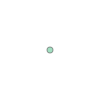

In [1]:
# import 'shapely.geometry.point' class
from shapely.geometry import Point

#create 'point' obejects
point1 = Point(2.2, 4.2)
point2 = Point(7.2, -25.1)
point3 = Point(9.26, -2.456)
point4_3D = Point(9.26, -2.456, 0.57)

#print out
point1

Alternatively, use a print statement to show the text representation of a shapely geometry object:

In [2]:
print(point1)
print(point4_3D)

POINT (2.2 4.2)
POINT Z (9.26 -2.456 0.57)


Let’s also check the data type of a point:

In [3]:
type(point1)

shapely.geometry.point.Point

## Point properties and methods

The `geom_type` property contains information about the geometry type of a shapely geometry:

In [4]:
point1.geom_type

'Point'

There are multiple ways to access the coordinates of geometry object. For instance, coords is a spapely.coords.CoordinateSequence. It is an Iterator, an efficient Python data structure to iterate over lists of items, but for now we can simply convert it into a list of the (one pair of) coordinates:

In [5]:
# get coordinate tuple
list(point1.coords)

[(2.2, 4.2)]

However, since points, by definition, only contain one coordinate tuple, shapely.geometry.Points have properties to directly access its coordinate values: the properties x, y, and (possibly) z, which are basic float type decimal numbers.

In [6]:
# read x and y coords separately
x = point1.x
y = point1.y

print(x, y)

2.2 4.2


In [7]:
# Read x, y, and z
x = point4_3D.x
y = point4_3D.y
z = point4_3D.z

print(x, y, z)

9.26 -2.456 0.57


It is also possible to calculate the distance between two objects using the distance method.

In our example the distance is calculated in a cartesian coordinate system. When working with real GIS data the distance is based on the used coordinate reference system. always check what is the unit of measurement (for example, meters) in the coordinate reference system you are using.

Let’s calculate the distance between point1 and point2:

In [8]:
# Check input data
print(point1)
print(point2)

POINT (2.2 4.2)
POINT (7.2 -25.1)


In [9]:
#calculate  the distance between point1 and point2
dist = point1.distance(point2)

print(f'Distance between the points is {dist:.2f} units')

Distance between the points is 29.72 units


**CAUTION**

Shapely geometries are, by design, agnostic (unaware) of the reference system used to represent them. Distances and surface area calculated using the built-in shapely methods will always: a) assume a flat, Cartesian, Euclidean space, and b) return the calculated value in the unit of the coordinates (e.g., meters, or degrees).

This is perfectly fine for small-scale geo-spatial operations, if you keep yourself aware of the expected output unit. Most packages built on top of shapely, for instance GeoPandas, which we will get to know in lesson 2, bring their own functions and take the coordinate reference system into consideration.

# Lines

Creating LineString objects is similar to creating Points. Instead of a single coordinate tuple, we pass a list of coordinate tuples, or a list of points, that make up the line:

In [10]:
# import linestring class
from shapely.geometry import LineString

# create linestring from point objects
line = LineString([point1, point2, point3])

In [11]:
# Create a LineString from a list of coordinates:
# (with the same coordinate values as the points, so results should be identical)
line2 = LineString([(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)])

In [12]:
# Check if the lines are, indeed, identical:
line == line2

True

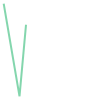

In [13]:
line

In [14]:
print(line)

LINESTRING (2.2 4.2, 7.2 -25.1, 9.26 -2.456)


In [15]:
#check data type
type(line)

shapely.geometry.linestring.LineString

In [16]:
#check geomtry type
line.geom_type

'LineString'

## LineString properties and methods

Linear geometries in their shapely representations (LineString, LinearRing, MultiLineString) have a variety of properties and methods that expose useful functionality. For instance, it is possible to access a geometry’s coordinates, calculate its lengths, find its centre point, create points along the line at a specified interval, or compute the closest distance between a line an another geometry

Fundamentally, accessing the coordinates of a line is very similar as accessing the ones of a point:

In [17]:
#get coords
list(line.coords)

[(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)]

If you would need to access all x-coordinates or all y-coordinates of the line, you can use its xy attribute (an iterator, but, again, for now, we can use them as lists):

In [18]:
#obtain x and y coords
xcoords = list(line.xy[0])
ycoords = list(line.xy[1])

print(xcoords)
print(ycoords)

[2.2, 7.2, 9.26]
[4.2, -25.1, -2.456]


Other properties of lines that are useful for GIS analyses include the length and the centre point (centroid) of lines:

In [19]:
#get lenght of line
line_length = line.length
print(f'length of line {line_length:.1f}')

length of line 52.5


In [20]:
#get center of line
print(line.centroid)

POINT (6.229961354035622 -11.892411157572392)


# Polygon

Creating a polygon geometry follows the same logic as creating a point or line geometry. However, as discussed above the rules for what constitutes a polygon are more complex: It is constructed of exactly one linear ring forming its exterior (perimeter), and any number of additional linear rings forming holes that are cut out of the exterior shell.

Consequently, the shapely.geometry.Polygon constructor function accepts two parameter: the first one, shell, is a list of coordinate tuples, a list of points, or a LinearRing, and will form the outer hull of the new polygon. The second, optional, parameter holes can be a list of holes to cut out of shell (the items in the list can be the same data types as shell).

For now, let’s create a simple polygon without any holes. The first example uses (at least three) coordinate tuples (three points are required to form a surface):

In [21]:
from shapely.geometry import Polygon

#create a polygon from the coords
polygon1 = Polygon([(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)])

We can also construct the polygon directly from a list of points:

In [22]:
polygon2 = Polygon([point1, point2, point3])

or from a LinearRing (which has an almost identical behaviour as a LineString, except that it is closed, i.e., the first and last point are identical):

In [23]:
from shapely.geometry import LinearRing

shell = LinearRing([point1, point2, point3, point1])
polygon3 = Polygon(shell)

In [24]:
polygon1 == polygon2 == polygon3

True

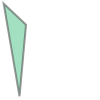

In [25]:
polygon1

In [26]:
#data type
type(polygon1)

shapely.geometry.polygon.Polygon

In [27]:
#geometry type
polygon1.geom_type

'Polygon'

## Let’s still see how to create a polygon with a hole:

In [28]:
# define the exterior
outer = LinearRing([(-180, 90), (-180, -90), (180, -90), (180, 90)])

# define a hole:
hole = LinearRing([(-170, 80), (-100, -80), (100, -80), (170, 80)])

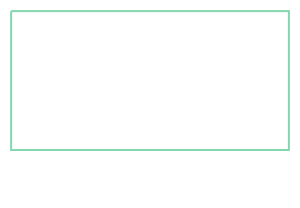

In [29]:
outer

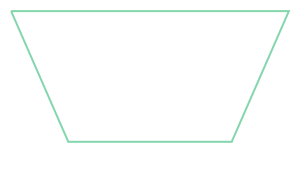

In [30]:
hole

A polygon using only the exterior shell

polygon_without_hole = Polygon(outer)
polygon_without_hole

And, finally, a polygon defined by the exterior shell, and one hole (note that holes need to be specified as a list):

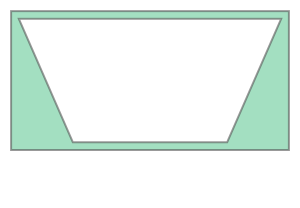

In [31]:
polygon_with_hole = Polygon(outer, [hole])
polygon_with_hole

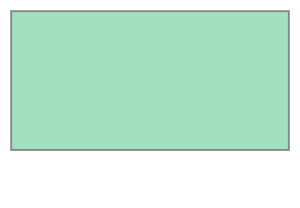

In [32]:
polygon_without_hole = Polygon(outer)
polygon_without_hole

## Polygon properties and methods

Very similar to lines and points, also shapely.geometry.Polygons expose a number of properties and methods that can be useful for spatial analysis tasks. Consult the shapely user manual for a complete list, and see a few examples here:

In [33]:
print(f"Polygon centroid: {polygon_with_hole.centroid}")
print(f"Polygon area: {polygon_with_hole.area}")
print(f"Polygon bounding box: {polygon_with_hole.bounds}")
print(f"Polygon exterior ring: {polygon_with_hole.exterior}")
print(f"Polygon circumference: {polygon_with_hole.exterior.length}")

Polygon centroid: POINT (0 -13.827160493827162)
Polygon area: 21600.0
Polygon bounding box: (-180.0, -90.0, 180.0, 90.0)
Polygon exterior ring: LINEARRING (-180 90, -180 -90, 180 -90, 180 90, -180 90)
Polygon circumference: 1080.0


## Plot these shapes using shapely!

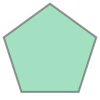

In [34]:
#Pentagon
pentagon = Polygon([(30, 2.01), (31.91, 0.62), (31.18, -1.63), (28.82, -1.63), (28.09, 0.62)])
pentagon

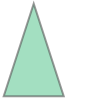

In [35]:
# Triangle
triangle = Polygon([(30, 2.01), (31.18, -1.63), (28.82, -1.63)])
triangle

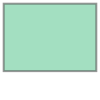

In [36]:
# Square
square = Polygon([(31.91, 0.62), (31.91, -1.63), (28.82, -1.63), (28.82, 0.62)])
square

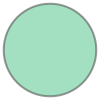

In [37]:
# circle (using a buffer around a point)
point = Point((0,0))
point.buffer(1)#the 1 is distance

# Geometry collections

Sometimes, it can be useful to store multiple geometries (for example, several points or several polygons) in a single feature.

**CAUTION**
By convention, data sets should always consist of either single- or multi-geometries. Some file formats enforce this, and many GIS tools refuse operation on data sets with mixed single- and multi-geometries.

If one feature in a data set is a MultiGeometry, all other features should be converted, too. All single geometries can be expressed as a collection of one item.

In shapely, collections of points are implemented as MultiPoint geometries, collections of lines as MultiLineString geometries, and collections of polygons as MultiPolygon geometries.

In [38]:
from shapely.geometry import MultiPoint, MultiLineString, MultiPolygon

# Create a MultiPoint object of our points 1,2 and 3
multipoint = MultiPoint([point1, point2, point3])

# We can also create a MultiLineString with two lines
line1 = LineString([point1, point2])
line2 = LineString([point2, point3])
multiline = MultiLineString([line1, line2])

print(multipoint)
print(multiline)

MULTIPOINT (2.2 4.2, 7.2 -25.1, 9.26 -2.456)
MULTILINESTRING ((2.2 4.2, 7.2 -25.1), (7.2 -25.1, 9.26 -2.456))


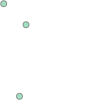

In [39]:
multipoint

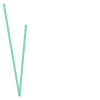

In [40]:
multiline

MultiPolygons are constructed in a similar manner. Let’s create a bounding box for ‘the world’ by combining two separate polygons that represent the western and eastern hemispheres.

POLYGON ((-180 90, -180 -90, 0 -90, 0 90, -180 90))


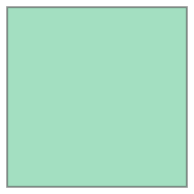

In [41]:
# Let’s create the exterior of the western part of the world
western_hemisphere = Polygon([(-180, 90), (-180, -90), (0, -90), (0, 90)])
print(western_hemisphere)
western_hemisphere

Shapely has a short-hand function for creating rectangular polygons, ‘boxes’. It can be used, for instance, to create bounding boxes using minimum and maximum x and y coordinates.

Let’s use shapely.geometry.box() for creating the polygon representing the the eastern hemisphere:

POLYGON ((180 -90, 180 90, 0 90, 0 -90, 180 -90))


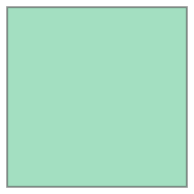

In [42]:
from shapely.geometry import box
min_x = 0
max_x = 180
min_y = -90
max_y = 90

eastern_hemisphere = box(min_x, min_y, max_x, max_y)

print(eastern_hemisphere)
eastern_hemisphere

we can combine the two polygons into a MultiPolygon:

MULTIPOLYGON (((-180 90, -180 -90, 0 -90, 0 90, -180 90)), ((180 -90, 180 90, 0 90, 0 -90, 180 -90)))


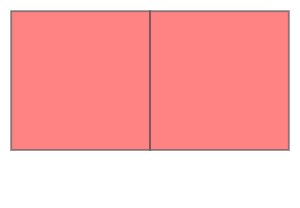

In [43]:
# Let’s create our MultiPolygon.
# Pass multiple Polygon objects as a list
multipolygon = MultiPolygon([western_hemisphere, eastern_hemisphere])

print(multipolygon)
multipolygon

# Convex hull and envelope

A ‘convex hull’ refers to the smallest possible convex polygon that can contain a geometry or a set of geometries. Alongside bounding boxes, convex hulls are useful to describe the extent of data sets.

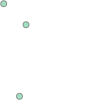

In [44]:
#check input geometry
multipoint

In [45]:
#conves hull
[multipoint.convex_hull, multipoint]

[<POLYGON ((7.2 -25.1, 2.2 4.2, 9.26 -2.456, 7.2 -25.1))>,
 <MULTIPOINT (2.2 4.2, 7.2 -25.1, 9.26 -2.456)>]

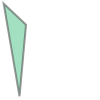

In [46]:
multipoint.convex_hull

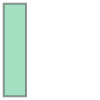

In [47]:
# Envelope (smalles rectangular polygon around a geometry/set of geometries):
multipoint.envelope

# Other Useful Attributes
lenght of the geometry collection:

In [64]:
print(f"Number of objects in our MultiLine: {len(multiline.geoms)}")
print(f"Number of objects in our MultiPolygon: {len(multipolygon.geoms)}")

Number of objects in our MultiLine: 2
Number of objects in our MultiPolygon: 2


In [72]:
#get area of multipolygon
multipolygon.area

64800.0

In [73]:
#Area
# Print outputs:
print(f"Area of our MultiPolygon: {multipolygon.area}")
print(f"Area of our Western Hemisphere polygon: {multipolygon.geoms[0].area}")

Area of our MultiPolygon: 64800.0
Area of our Western Hemisphere polygon: 32400.0


# Validity of geometries

As discussed on the very top of this page, already the geometric primitives have certain requirements. For instance, a LineString must consist of at least two points, and a Polygon’s exterior shell and holes must not intersect.

Each shapely geometry has a built-in check that can be of great help, for instance, finding topological errors:

In [48]:
print(f"Is polygon valid?: {polygon_with_hole.is_valid}")

Is polygon valid?: True


# Exercise 1

## Problem 1: Creating basic geometries

### 1a. Point geometry
Create a function called create_point_geometry() that accepts two parameters, x_coord and y_coord. The function should return a shapely.geometry.Point geometry object.

Create a function called create_point_geometry() that accepts two parameters, x_coord and y_coord. The function should return a shapely.geometry.Point geometry object.

In [49]:
#import functions
import pandas as pd
from shapely.geometry import Point, LineString, Polygon

#create funtion that accepts x and y parameters
def create_point_geometry(x_coord, y_coord):
    return Point(x_coord, y_coord)

In [50]:
# NON-EDITABLE CODE CELL FOR TESTING YOUR SOLUTION
point1 = create_point_geometry(0.0, 1.1)
print(point1)
print(point1.geom_type)

POINT (0 1.1)
Point


### 1b.  Line Geometry
Create a function called create_line_geometry() that takes a list of shapely.geometry.Points as an argument, and returns a shapely.geometry.LineString object of those input points.

In [51]:
#create a function that shapely point and returns shapely Linestring
def create_line_geometry(points):
    assert type(points) is list, 'Input should be a list'
    assert len(points) >= 2, 'At minimum two points are required for LineString'
    assert all(isinstance(i, Point) for i in points), 'All list values must be of type shapely.geometry.Point'

    return LineString(points)

In [52]:
# add points and check function
line1 = create_line_geometry([Point(45.2, 22.34), Point(100.22, -3.20)])

In [53]:
type(point1)

shapely.geometry.point.Point

In [54]:
# NON-EDITABLE CODE CELL FOR TESTING YOUR SOLUTION
print(line1)
print(line1.geom_type)

LINESTRING (45.2 22.34, 100.22 -3.2)
LineString


In [55]:
# NON-EDITABLE CODE CELL FOR TESTING YOUR SOLUTION
try:
    # Pass something else than a list
    create_line_geometry("Give me a line!")
except AssertionError as exception:
    print(f"The function (correctly) detected an error. The error message was ‘{exception.args[0]}’")
except Exception as exception:
    raise exception

The function (correctly) detected an error. The error message was ‘Input should be a list’


### 1c Polyon Geometry
Create a function create_polygon_geometry() that accepts one parameter coordinates. coordinates should be a list of coordinate tuples. The function should create and return a shapely.geometry.Polygon object based on these coordinates.

In [56]:
'''#create polygon geometry
def create_polygon_geometry(coordinates):
    poly = Polygon([(p.x, p.y) for p in coordinates])# need to use list comprehension to extract the x and y coords from the list of tuppples
    assert type(coordinates) is list, 'Input should be a list'
    assert len(coordinates) >= 3, 'At minimum 3 points are needed'
    assert all(isinstance(i, tuple) and len(i) == 2 for i in coordinates), 'All list values must be coordinate tuples'
    assert all(isinstance(i, int or float) for i in coordinates), 'Values must be int or float'

    return poly'''

"#create polygon geometry\ndef create_polygon_geometry(coordinates):\n    poly = Polygon([(p.x, p.y) for p in coordinates])# need to use list comprehension to extract the x and y coords from the list of tuppples\n    assert type(coordinates) is list, 'Input should be a list'\n    assert len(coordinates) >= 3, 'At minimum 3 points are needed'\n    assert all(isinstance(i, tuple) and len(i) == 2 for i in coordinates), 'All list values must be coordinate tuples'\n    assert all(isinstance(i, int or float) for i in coordinates), 'Values must be int or float'\n\n    return poly"

Here’s an updated version of your code that allows the input to be a list of shapely.geometry.Point objects:

In this updated version of your code, we first check if the input is a list. If it’s not a list, we raise a TypeError with an appropriate error message. If the length of the input is less than 3, we raise a ValueError with an appropriate error message.

Next, we check if all elements in the input are tuples with length 2. If they are tuples, we create a polygon based on these points using the Polygon() function from the shapely.geometry module.

If all elements in the input are instances of shapely.geometry.Point, we create a polygon based on these points by converting each point to a tuple using (p.x, p.y) and passing this list of tuples to the Polygon() function.

If the input is neither a list of tuples nor a list of shapely.geometry.Point, we raise a ValueError with an appropriate error message.

In [57]:
#create polygon geometry
def create_polygon_geometry(coords):
    if not isinstance(coords, list):
        raise TypeError('Input should be a list')
    if len(coords) < 3:
        raise ValueError('At minimum 3 points are needed')
    if all(isinstance(i, tuple) and len(i) == 2 for i in coords):
        return Polygon(coords)
    elif all(isinstance(i, Point) for i in coords):
        return Polygon([(p.x, p.y) for p in coords])
    else:
        raise ValueError('Input should be a list of tuples or Points')

In [58]:
# alternatine
'''from typing import List
from shapely.geometry import Polygon, Point

def create_polygon_geometry(coordinates: List) -> Polygon:
    if not isinstance(coordinates, list):
        raise ValueError("Input should be a list")
    if len(coordinates) < 3:
        raise ValueError("At minimum three points are required for a polygon")
    for coord in coordinates:
        if not isinstance(coord, tuple):
            raise ValueError("All list values must be coordinate tuples")
        if len(coord) != 2:
            raise ValueError("All tuples must have two values")
        if not all(isinstance(val, (int, float)) for val in coord):
            raise ValueError("All tuple values must be instances of either int or float")
    if all(isinstance(coord, Point) for coord in coordinates):
        return Polygon([[point.x, point.y] for point in coordinates])
    return Polygon(coordinates)'''

'from typing import List\nfrom shapely.geometry import Polygon, Point\n\ndef create_polygon_geometry(coordinates: List) -> Polygon:\n    if not isinstance(coordinates, list):\n        raise ValueError("Input should be a list")\n    if len(coordinates) < 3:\n        raise ValueError("At minimum three points are required for a polygon")\n    for coord in coordinates:\n        if not isinstance(coord, tuple):\n            raise ValueError("All list values must be coordinate tuples")\n        if len(coord) != 2:\n            raise ValueError("All tuples must have two values")\n        if not all(isinstance(val, (int, float)) for val in coord):\n            raise ValueError("All tuple values must be instances of either int or float")\n    if all(isinstance(coord, Point) for coord in coordinates):\n        return Polygon([[point.x, point.y] for point in coordinates])\n    return Polygon(coordinates)'

In [59]:
#demonstrate
polygon1 = [(45.2, 22.34), (100.22, -3.20), (70.0, 10.20)]
polygon1 = create_polygon_geometry(polygon1)

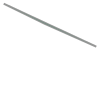

In [60]:
polygon1

## Problem 2: Attributes of geometries

### 2a Get Centroid
Create a function called get_centroid() that accepts one parameter, geom. The function should take any kind of Shapely’s geometry objects (any instance of shapely.geometry.base.BaseGeometry) as an input, and return the centroid of that geometry.

In [61]:
#import shapely geometry
from shapely.geometry.base import BaseGeometry

# create function for shapely geometry
def get_centroid(geom):
    assert isinstance(geom, BaseGeometry), 'input must be a shapely geometry'
    return geom.centroid

In [62]:
type(polygon1)

shapely.geometry.polygon.Polygon

In [63]:
#test the function
centroid_poly = get_centroid(polygon1)
print(centroid_poly)

POINT (71.80666666666667 9.780000000000001)


### 2b. Get Area
Create a function get_area() accepting one parameter polygon.

In [64]:
#create get are function only accepting polygon
def get_area(polygon):
    assert isinstance(polygon, Polygon), 'Input should be a shapely Polygon'
    return polygon.area

In [65]:
# NON-EDITABLE CODE CELL FOR TESTING YOUR SOLUTION
area = get_area(polygon1)
print(round(area, 2))

17.28


### 2c. Get Length
Create a function get_length() accepting one parameter, geometry.

In [66]:
#create funtion to get either line or polygo and get length/circumference

def get_length(geometry):
    if isinstance(geometry, LineString):
        return geometry.length
    if isinstance(geometry, Polygon):
        return geometry.exterior.length
    else:
        raise ValueError('geometry’ should be either a LineString or a Polygon')

In [67]:
line1_length = get_length(line1)
print(line1_length)

60.65881634189707


In [68]:
poly_length = get_length(polygon1)
print(poly_length)

121.32841570092893


## Problem 3 Reading coordinates from a text file, and creating geometries

### 1. use pandas to read the file into a variable data

In [69]:
#import pandas
import pandas as pd

# read in data file
data = pd.read_csv('travel_times_2015_helsinki.txt',
                   sep=';',
)

data.head()

,from_id,to_id,fromid_toid,route_number,at,from_x,from_y,to_x,to_y,total_route_time,route_time,route_distance,route_total_lines
0,5861326,5785640,5861326_5785640,1,08:10,24.970438,60.311917,24.856034,60.399941,125.0,99.0,22917.6,2.0
1,5861326,5785641,5861326_5785641,1,08:10,24.970438,60.311917,24.860568,60.400014,123.0,102.0,23123.5,2.0
2,5861326,5785642,5861326_5785642,1,08:10,24.970438,60.311917,24.865102,60.400086,125.0,103.0,23241.3,2.0
3,5861326,5785643,5861326_5785643,1,08:10,24.970438,60.311917,24.869636,60.400159,129.0,107.0,23534.2,2.0
4,5861326,5787544,5861326_5787544,1,08:10,24.970438,60.311917,24.842582,60.397478,118.0,92.0,22428.2,2.0


In [70]:
#check rows and columns in data set
print(data.shape)

(14643, 13)


In [71]:
#check null values
data.isnull().any()

from_id              False
to_id                False
fromid_toid          False
route_number         False
at                   False
from_x               False
from_y               False
to_x                 False
to_y                 False
total_route_time     False
route_time           False
route_distance       False
route_total_lines    False
dtype: bool

### 2. select the 4 columns that contain coordinate information (from_x, from_y, to_x, to_y),

In [72]:
#select columns
data = data.filter(['from_x', 'from_y', 'to_x', 'to_y'])
data.head()

,from_x,from_y,to_x,to_y
0,24.970438,60.311917,24.856034,60.399941
1,24.970438,60.311917,24.860568,60.400014
2,24.970438,60.311917,24.865102,60.400086
3,24.970438,60.311917,24.869636,60.400159
4,24.970438,60.311917,24.842582,60.397478


### 3. Finally, create two lists called origin_points and destination_points that contain shapely.geometry.Point

In [73]:
#Approach A, using for loop
#from shapely.geometry import Point, LineString, Polygon

#create list for two sets of points
'''origin_points = []
destination_points = []

for idx, row in data.iterrows():

    #create shapely points for based on coordinate column
    from_points = Point(row[0], row[1])
    to_points = Point(row[2], row[3])

    #append to created list
    origin_points.append(from_points)
    destination_points.append(to_points)'''

'origin_points = []\ndestination_points = []\n\nfor idx, row in data.iterrows():\n\n    #create shapely points for based on coordinate column\n    from_points = Point(row[0], row[1])\n    to_points = Point(row[2], row[3])\n\n    #append to created list\n    origin_points.append(from_points)\n    destination_points.append(to_points)'

In [74]:
#Approach B, use apply function and lambda function
#create a function that converts data to points
'''def get_start_points(row):
    """Create a Point geometry from a row with x and y values."""
    start_points = Point(row['from_x'], row['from_y'])
    return start_points

origin_points = data.apply(get_start_points, axis=1)

def get_end_points(row):
    """Create a Point geometry from a row with x and y values."""
    end_points = Point(row['to_x'], row['to_y'])
    return end_points

destination_points = data.apply(get_end_points, axis=1)'''

'def get_start_points(row):\n    """Create a Point geometry from a row with x and y values."""\n    start_points = Point(row[\'from_x\'], row[\'from_y\'])\n    return start_points\n\norigin_points = data.apply(get_start_points, axis=1)\n\ndef get_end_points(row):\n    """Create a Point geometry from a row with x and y values."""\n    end_points = Point(row[\'to_x\'], row[\'to_y\'])\n    return end_points\n\ndestination_points = data.apply(get_end_points, axis=1)'

In [75]:
#Approach A, using for loop
from shapely.geometry import Point, LineString, Polygon

# using lambda function
origin_points = data.apply(
    lambda row: Point(row['from_x'], row['from_y']),
    axis=1
)

destination_points = data.apply(
    lambda row: Point(row['to_x'], row['to_y']),
    axis=1
)

In [76]:
type(len(origin_points))

int

In [77]:
len(destination_points)

14643

## Problem 4: Creating LineStrings that represent the movements

### 1. To create the shapely.geometry.LineStrings for each pair of origins and destinations
- need to loop over both lists at the same time.

In [78]:
# Approach A, using zip function
#create empty list
lines = []

# iterrate over origin and destination lists in parallel
for start, end in zip(origin_points, destination_points):
    lines_cords = LineString((start, end))
    lines.append(lines_cords)

In [79]:
#Approach B, using for range
#create empty list
'''lines = []

#iterrate over list
for i in range(len(origin_points)):
    lines_cords = LineString((origin_points[i], destination_points[i]))
    lines.append(lines_cords)'''

'lines = []\n\n#iterrate over list\nfor i in range(len(origin_points)):\n    lines_cords = LineString((origin_points[i], destination_points[i]))\n    lines.append(lines_cords)'

In [80]:
# NON-EDITABLE CODE CELL FOR TESTING YOUR SOLUTION

# Test that the list has correct number of LineStrings
assert len(lines) == len(data), "There should be as many lines as there are rows in the original data"

### 2. Create a variable called total_length, and store the total (Euclidian) distance
- store the total (Euclidian) distance of all the origin-destination LineStrings that we just created into that variable.

In [81]:
# create a total legth varaible starting from 0
total_length = 0

for line in lines:
    total_length += line.length

print(total_length)

3148.570780865155


In [82]:
# NON-EDITABLE CODE CELL FOR TESTING YOUR SOLUTION

# This test print should print the total length of all lines
print("Total length of all lines is", round(total_length, 2))
assert round(total_length, 2) == 3148.57

Total length of all lines is 3148.57


### 3. Create functions that automate the functionality you implemented for part (1) and part (2) of this problem:

In [83]:
# create function that accepts two lists of shapely.geometry.Points and returns a list of shapely.geometry.LineStrings
def create_od_lines(list_1, list_2):
    
    lines = []

    #loop through list to create linestrings
    for start, end in zip(list_1, list_2):
        line = LineString((start, end))
        lines.append(line)
    return(lines)

In [84]:
#create function for calculating total distance
def calculate_total_distance(lines):
    '''create total length variable'''
    total_length = 0
    '''iterate through list'''
    for line in lines:
        total_length += line.length
    return total_length

In [85]:
# NON-EDITABLE CODE CELL FOR TESTING YOUR SOLUTION

# Create origin-destination lines
od_lines = create_od_lines(origin_points, destination_points)

# Calculate the total distance
tot_dist = calculate_total_distance(od_lines)

print("Total distance", round(tot_dist,2))
assert tot_dist == total_length

Total distance 3148.57
